<a href="https://colab.research.google.com/github/SreedeviRKrishnan/FDP_ASIET_DLforCV/blob/main/Day5_hyperparameterturning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

In [3]:
os.chdir('/content/drive/MyDrive/ASIET_FDP')

In [4]:
pwd

'/content/drive/MyDrive/ASIET_FDP'

In [5]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.5 MB/s eta 0:00:00


In [6]:
!ls
#to use linux cms in co lab use syntax !cmd  ie !+linux cmd


cat.jpg				  Fdp_flower_cnn.ipynb	model_CNN.png
Day5_hyperparameterturning.ipynb  Flower_dataset
DLforCVFDPDay4.ipynb		  Flower_dataset.zip


In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [8]:
print(tf.__version__)

#colab uses only stable version but not latest

2.9.2


In [9]:
fashion_mnist = keras.datasets.fashion_mnist

#Fashion MNIST dataset available in keras with 10 categories


In [10]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Scaling data

In [11]:
print(np.min(train_images))
print(np.max(train_images))
print(np.min(test_images))

np.max(test_images)

0
255
0


255

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

In [13]:
print("Train Minimum", np.min(train_images))
print("Train Maximum",np.max(train_images))
print("Test Minimum",np.min(test_images))
print("Test Maximum",np.max(test_images))

Train Minimum 0.0
Train Maximum 1.0
Test Minimum 0.0
Test Maximum 1.0


In [14]:
train_images[0].shape

(28, 28)

In [15]:
train_images.shape
#60K images 28x28 

(60000, 28, 28)

train_images[0]

In [16]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
plt.figure(figsize=(15,15))
#width and height 

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

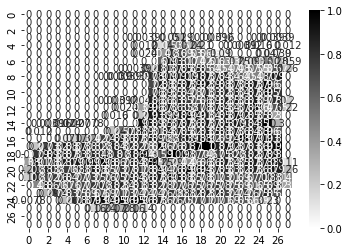

In [19]:
sns.heatmap(train_images[0],annot=True,cmap="binary")

#Reshaping the data to feed it to CNN

3d array is converted to 4d 

for train and test images

In [20]:
train_images = train_images.reshape(len(train_images), 28,28,1)
test_images = test_images.reshape(len(test_images), 28,28,1)

In [21]:
train_images.shape

(60000, 28, 28, 1)

In [22]:
test_images.shape

(10000, 28, 28, 1)

# Tuning function
hp - hyper parameter
# Tuners
# RandomSearch Tuner

*  


# Hyperband Tuner

*


# BayesianOptimization Tuner

*   


# RandomSearch concept:
One way to find the optimal parameters is to try every possible combinations of the available parameters [Grid Search], but the number of combinations would increase exponentially as the number of hyperparameters increases. Trying all the combinations one by one takes longer to explore the hyperparameter space. Random search helps to explore more hyperparameter space in less time as compared to Grid Search. Exploring more hyperparameter space does not guarantee the absolute optimal results but close to optimal.
# Hyperband Concept:
This technique tries to remove one of the problems in random search of hyperparameters. Problem is as follows: Random search may pick some values which are very obviously bad and will do full training and evaluation on it, which is wasteful. Hyperband provides one way to solve this problem. Hyperband Solution: Randomly sample all the combinations of hyperparameter and now instead of running full training and evaluation on it, train the model for few epochs (less than max_epochs) with these combinations and select the best candidates based on the results on these few epochs. It does this iteratively and finally runs full training and evaluation on the final chosen candidates. The number of iterations done depends on parameter ‘hyperband_iterations’ and number of epochs in each iteration are less than ‘max_epochs’.
# Bayesian Optimization tuner Concept:
This techniques addresses a common problem in RandomSearch and Hyperband. Problem: All the hyperparameter combinations are chosen randomly. Choosing hyperparameters randomly helps to explore the hyperparameter space but does not guarantee absolute optimal hyperparameters. Solution provided by BayesianOptimization tuner: Instead of all combinations being random, it chooses first few randomly, then based on the performance on these hyperparameters it chooses the next best possible hyperparameters. Hence it takes into account the history of the hyperparameters which were tried. The iterations of choosing next set of hyperparameters based on history and evaluating performance continues till the tuner reaches optimal hyperparameters or exhausts maximum number of allowed trails. Maximum trials are set using parameter ‘max_trails’.

In [23]:
#random search hp- is hyper parameter 
#machine try out 32 to 128 filter values automatically min and max vaul
# list[3,5] seelct random value 3 or 5
# 32 filter and 3 kernals
#layers

# last layer op use softmax activation since 10 classes its multiclass classification

def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [24]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-24-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [25]:
tuner_search = RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

# max trial of 5 is done

in each rial 3 epochs will be done

In [26]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.874666690826416

Best val_accuracy So Far: 0.9164999723434448
Total elapsed time: 00h 02m 36s


In [27]:
model=tuner_search.get_best_models(num_models=1)[0]

Best model is taken to model

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 80)        800       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 48)        34608     
                                                                 
 flatten (Flatten)           (None, 27648)             0         
                                                                 
 dense (Dense)               (None, 128)               3539072   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,575,770
Trainable params: 3,575,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1055 - accuracy: 0.9610 - val_loss: 0.2775 - val_accuracy: 0.9158
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0680 - accuracy: 0.9753 - val_loss: 0.3390 - val_accuracy: 0.9168
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0439 - accuracy: 0.9843 - val_loss: 0.3481 - val_accuracy: 0.9182
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0299 - accuracy: 0.9892 - val_loss: 0.4758 - val_accuracy: 0.9073
Epoch 8/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0226 - accuracy: 0.9920 - val_loss: 0.4869 - val_accuracy: 0.9125
Epoch 9/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0192 - accuracy: 0.9931 - val_loss: 0.5511 - val_accuracy: 0.9138
Epoch 10/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0181 - accuracy: 0.9936 - val_loss: 0.5781 - val_accurac

to make use of the best model from 4th epochs

In [30]:
loss, accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5408 - accuracy: 0.9118


In [31]:
loss

0.540763258934021

In [32]:
accuracy

0.9118000268936157

In [33]:
tuner_search.results_summary()

Results summary
Results in output/Mnist Fashion
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 128
learning_rate: 0.001
Score: 0.9164999723434448
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 3
conv_2_filter: 32
conv_2_kernel: 5
dense_1_units: 80
learning_rate: 0.001
Score: 0.9075000286102295
Trial summary
Hyperparameters:
conv_1_filter: 96
conv_1_kernel: 3
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 128
learning_rate: 0.01
Score: 0.8826666474342346
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 3
conv_2_filter: 64
conv_2_kernel: 3
dense_1_units: 96
learning_rate: 0.01
Score: 0.874666690826416
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 3
dense_1_units: 80
learning_rate: 0.01
Score: 0.8641666769981384
